### Takes best_returns of QA model and plot's the similarities

#### Calculating Similarity

In [46]:
import json
from difflib import SequenceMatcher

In [47]:
def calculate_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

def clean_text(text):
    special_characters = ['.', ',', '!', '?', ':', ';']
    for char in special_characters:
        text = text.replace(char, '')
    return text.strip().lower()

In [48]:
best_returns_path = '../qa_results/returns.json'
similarity_result_added_path = f'{best_returns_path[:-5]}_similarity.json'
datas = json.load(open(best_returns_path))

In [49]:
for data in datas:
    for item in data['results']:
        similarity = calculate_similarity(clean_text(item['Answer']), clean_text(item['Best_Answer']))
        item["Calculated_Similarity"] = similarity

In [50]:
with open(f"{similarity_result_added_path}", 'w') as f:
    json.dump(datas, f, indent=4)

#### Plotting Results

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator


In [52]:
datas_with_similarities = json.load(open(similarity_result_added_path))

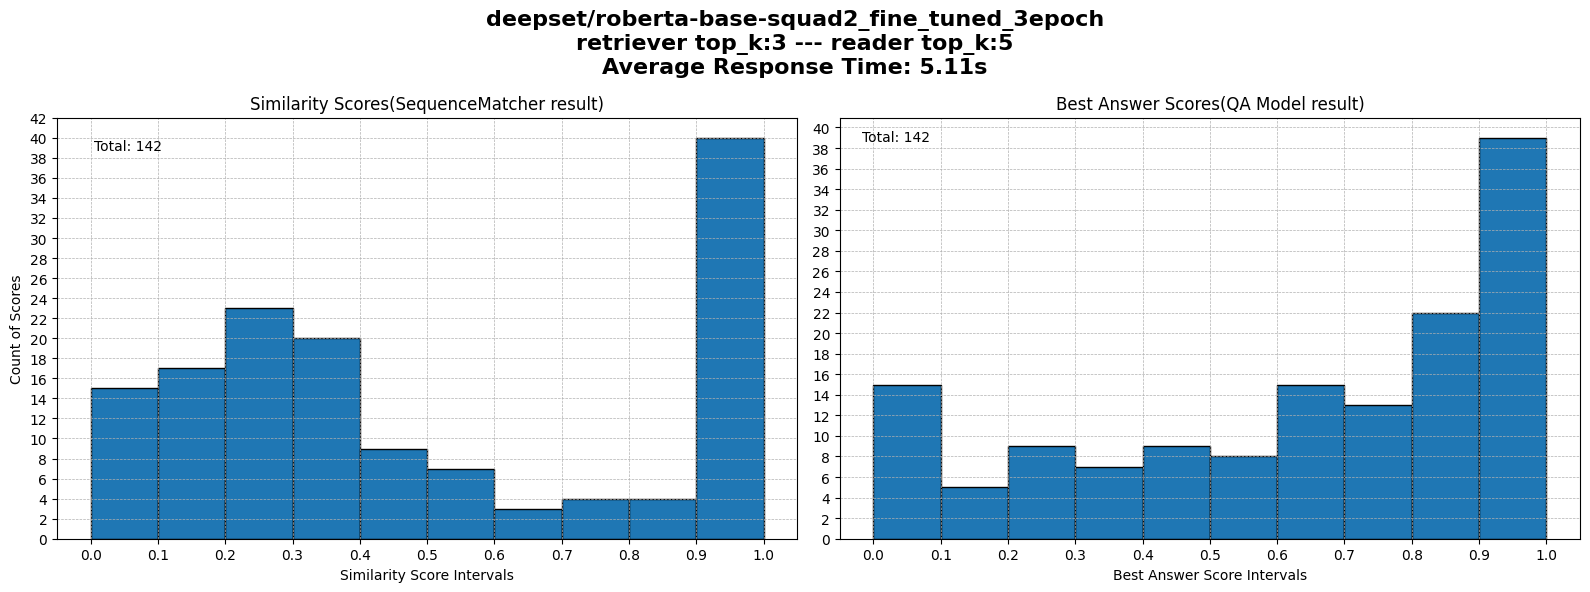

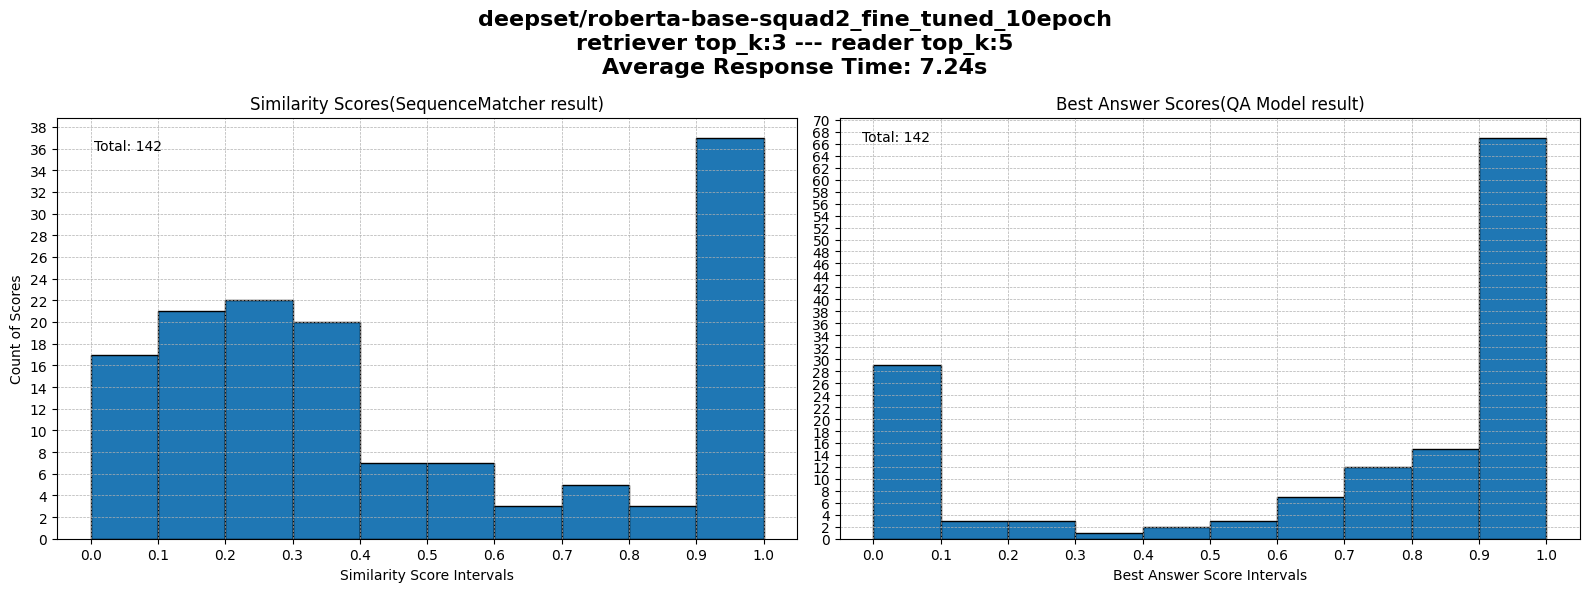

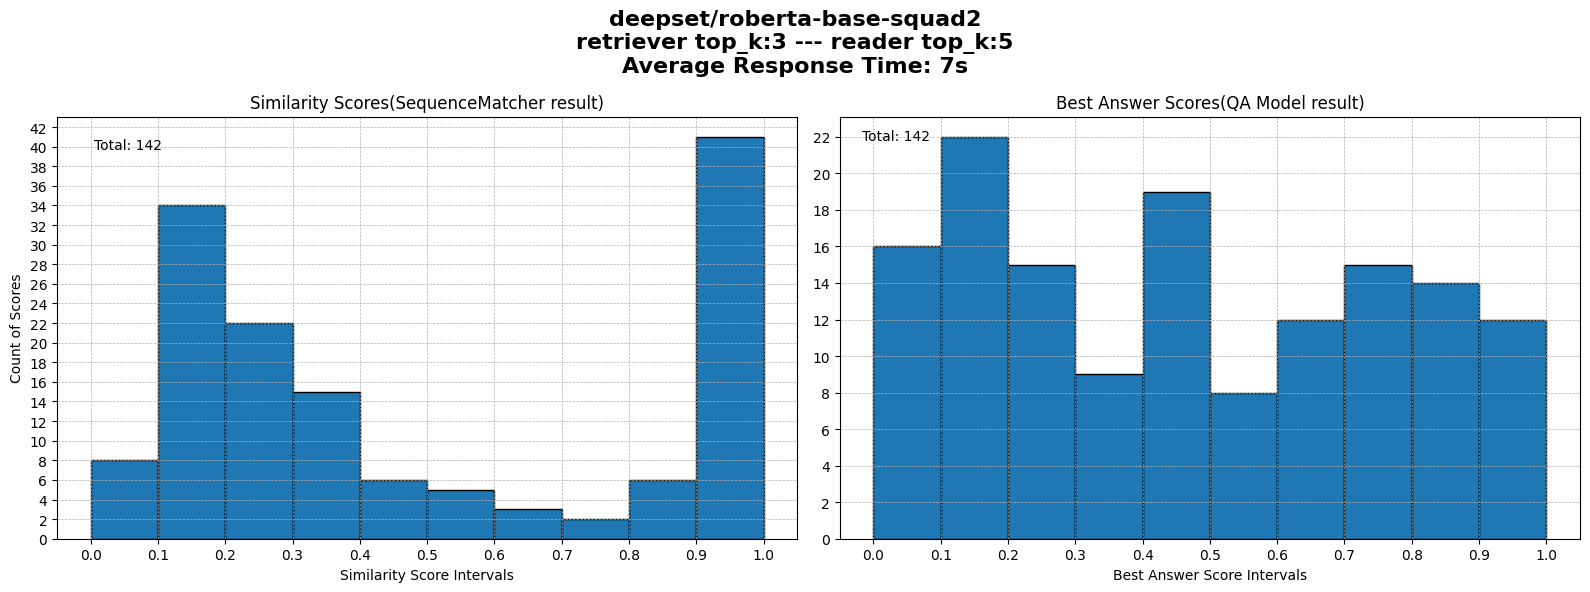

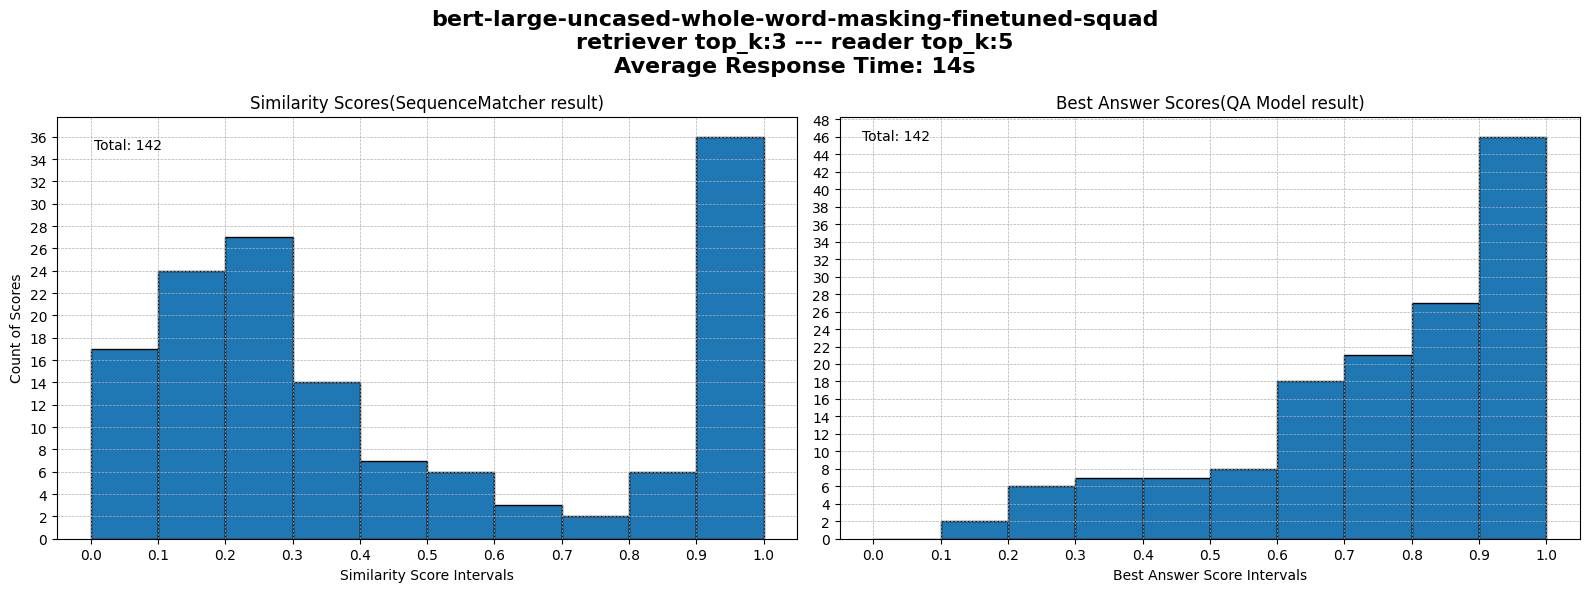

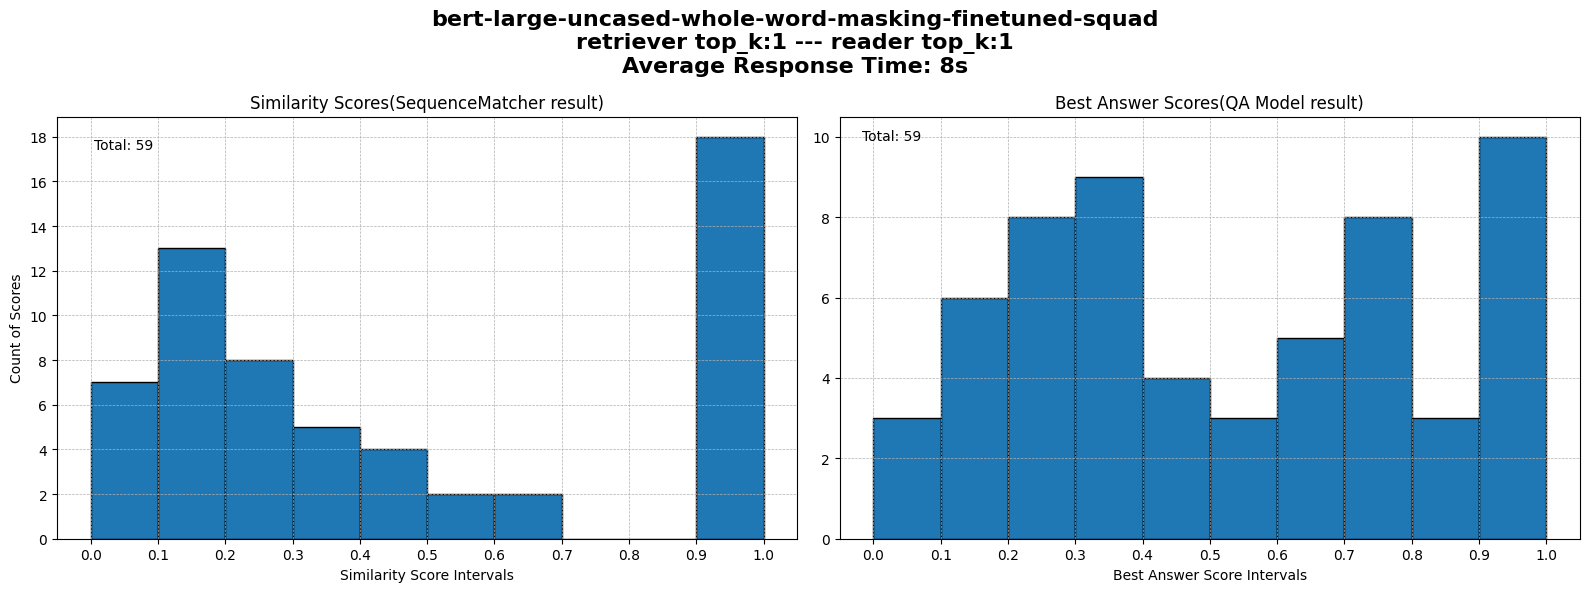

In [53]:
for data_with_similarities in datas_with_similarities:
    similarities = [item['Calculated_Similarity'] for item in data_with_similarities["results"]]
    best_answer_scores = [item['Best_Answer_Score'] for item in data_with_similarities["results"]]
    total_data = len(similarities)

    bins = [i * 0.1 for i in range(11)]

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
    fig.suptitle(f"{data_with_similarities['params']['model']}\nretriever top_k:{data_with_similarities['params']['retriever']} --- reader top_k:{data_with_similarities['params']['reader']}\nAverage Response Time: {data_with_similarities['params']['response_time']}s", fontsize=16, fontweight='bold')
    #write as title params to plots
    axs[0].set_title(data_with_similarities['params'])
    axs[1].set_title(data_with_similarities['params'])

    axs[0].hist(similarities, bins=bins, edgecolor='black')
    axs[0].xaxis.set_major_locator(MultipleLocator(0.1))
    axs[0].yaxis.set_major_locator(MultipleLocator(2))
    axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[0].set_title('Similarity Scores(SequenceMatcher result)')
    axs[0].set_xlabel('Similarity Score Intervals')
    axs[0].set_ylabel('Count of Scores')
    axs[0].text(0.05, 0.95, f'Total: {total_data}', transform=axs[0].transAxes, verticalalignment='top')

    axs[1].hist(best_answer_scores, bins=bins, edgecolor='black')
    axs[1].xaxis.set_major_locator(MultipleLocator(0.1))
    axs[1].yaxis.set_major_locator(MultipleLocator(2))
    axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[1].set_title('Best Answer Scores(QA Model result)')
    axs[1].set_xlabel('Best Answer Score Intervals')
    axs[1].text(0.03, 0.97, f'Total: {total_data}', transform=axs[1].transAxes, verticalalignment='top')

    plt.tight_layout()
    plt.show()


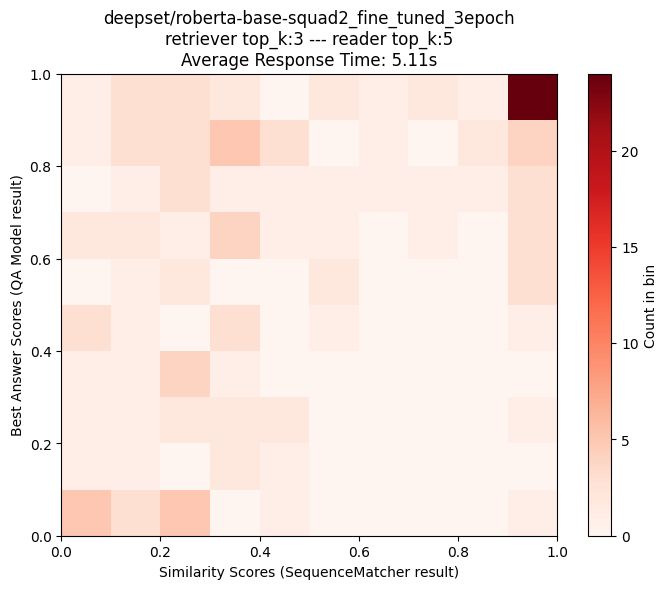

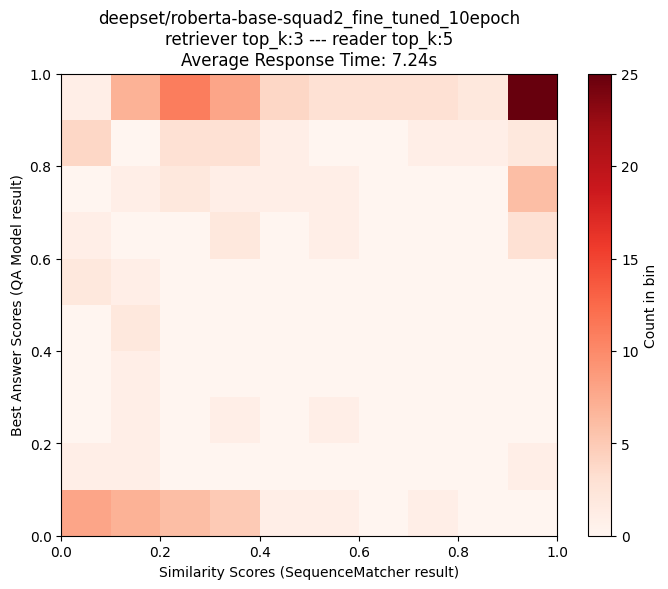

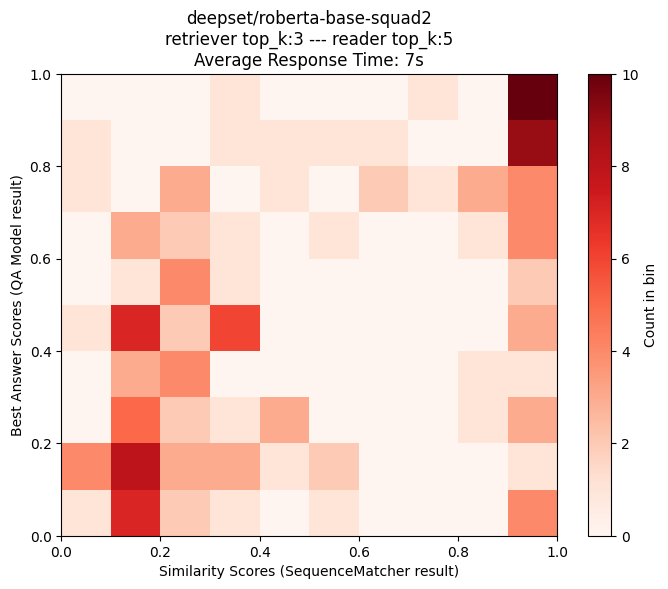

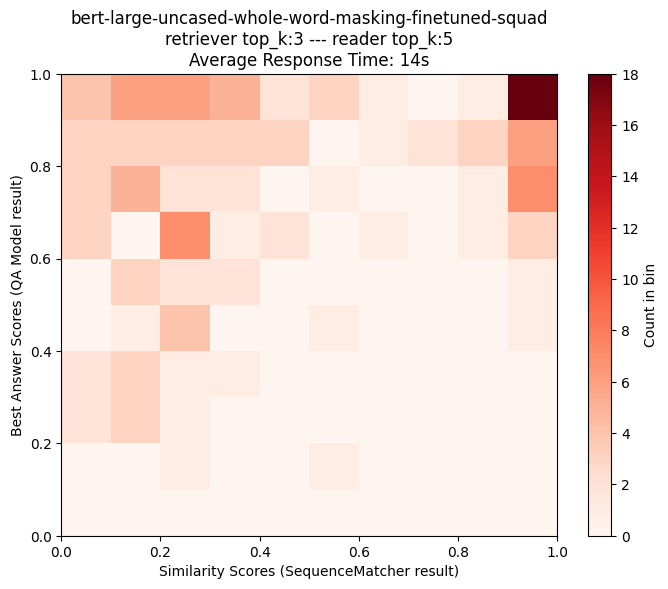

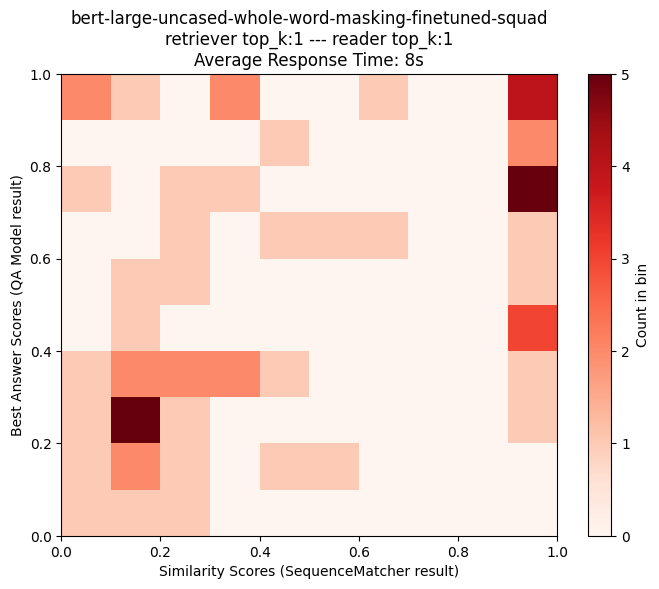

In [54]:
for data_with_similarities in datas_with_similarities:
    similarities = [item['Calculated_Similarity'] for item in data_with_similarities['results']]
    best_answer_scores = [item['Best_Answer_Score'] for item in data_with_similarities['results']]

    # Define the number of bins for each axis
    xbins = np.arange(0, 1.1, 0.1)
    ybins = np.arange(0, 1.1, 0.1)

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    plt.hist2d(similarities, best_answer_scores, bins=[xbins, ybins], cmap='Reds')
    plt.colorbar(label='Count in bin')

    plt.title(f"{data_with_similarities['params']['model']}\nretriever top_k:{data_with_similarities['params']['retriever']} --- reader top_k:{data_with_similarities['params']['reader']}\nAverage Response Time: {data_with_similarities['params']['response_time']}s")
    plt.xlabel('Similarity Scores (SequenceMatcher result)')
    plt.ylabel('Best Answer Scores (QA Model result)')

    plt.show()